In [1]:
import numpy as np
import matplotlib.pyplot as plt
import run_simple_energy_loss

from matplotlib import colors as mcolors

# Figure config
LEGEND_SIZE = 12

#### Next we will load the simulation. 
 - It will take a numpy array with dimension M x N as input.
    - M number of design points
    - N number of model parameters of the model
 - It will return a M x P numpy array.
     - M number of design points
     - P number of Momentem bins

In [2]:
simulation=run_simple_energy_loss.run_simulation

#### Make a design matrix

There are 4 parameters currently taken as model parameters. 
 - Initialization
     - T0_in_GeV (deafult value 0.3)
     - tau0 (deafult value 0.2)
     - Tf_in_GeV (deafult value 0.15)
 - Parton Energy loss rates
     - alpha_s (deafult value 0.1)

In [3]:
hbarc=0.1973

In [4]:
from emukit.core import ParameterSpace, ContinuousParameter

In [5]:
parameter_space = ParameterSpace([ContinuousParameter('alpha_s', 0.2,0.4 )])

In [6]:
from emukit.core.initial_designs import RandomDesign

design = RandomDesign(parameter_space)
num_data_points = 2
X = design.get_samples(num_data_points)

In [7]:

# design matrix has to have M by N shape. Rows should be design points

def f(alpha_s):
    """returns simulation output for alpha_s design matrix"""
    n_design=alpha_s.shape[0]
   # print(n_design)
    p_mom=(1, 10, 10)
    # design for alpha_s parameter
    T0_in_fm = np.full((n_design,1), 0.3)
    tau0 = np.full((n_design,1), 0.2)
    Tf_in_fm = np.full((n_design,1), 0.15)
    # We will only consider the change in modle parameter for now
    alpha_s = alpha_s.reshape(-1,1)
    design = np.hstack([T0_in_fm, tau0, Tf_in_fm, alpha_s])
   # print(design.shape)
    observables=simulation(design,*p_mom)
    #Let's just return only one obsrvable for now. The middle p_T bin
    return observables[:,5].reshape(-1,1)

In [8]:
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper

Y = f(X)
model_gpy = GPRegression(X,Y)
model_emukit = GPyModelWrapper(model_gpy)

Working on 0/2 designs


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Working on 1/2 designs
Shape of the result array is (2, 10)


In [9]:
from emukit.experimental_design.acquisitions import IntegratedVarianceReduction, ModelVariance

model_variance = ModelVariance(model = model_emukit)
integrated_var = IntegratedVarianceReduction(model = model_emukit, space=parameter_space)

In [10]:
from emukit.experimental_design import ExperimentalDesignLoop
expdesign_loop = ExperimentalDesignLoop(model = model_emukit,
                                         space = parameter_space,
                                         acquisition = integrated_var,
                                         batch_size = 1)

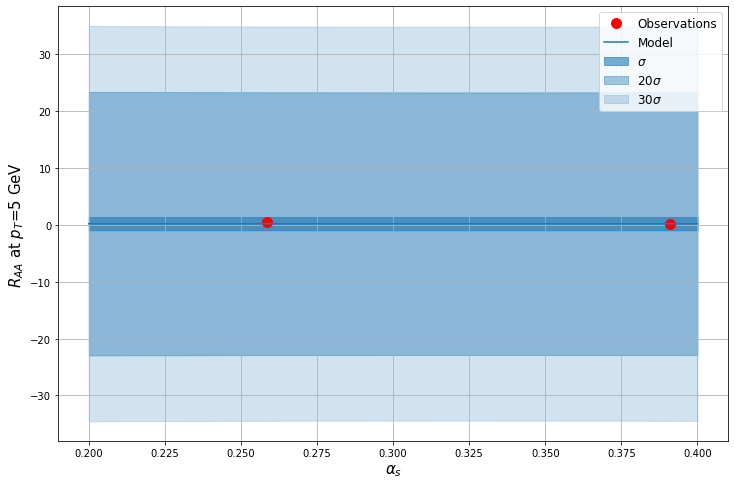

Optimization restart 1/1, f = 0.5444603889811592
Working on 0/1 designs


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Shape of the result array is (1, 10)
Optimization restart 1/1, f = -3.1836837423410493


<Figure size 432x288 with 0 Axes>

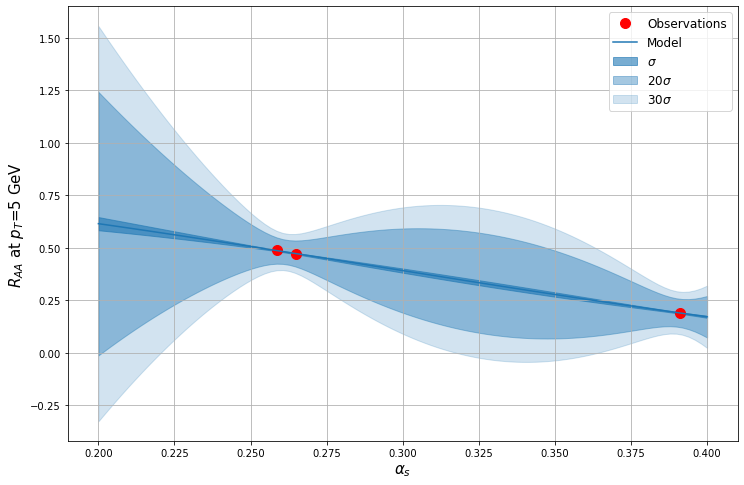

Optimization restart 1/1, f = -3.1836837423409943
Working on 0/1 designs


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Shape of the result array is (1, 10)
Optimization restart 1/1, f = -7.66831247578274


<Figure size 432x288 with 0 Axes>

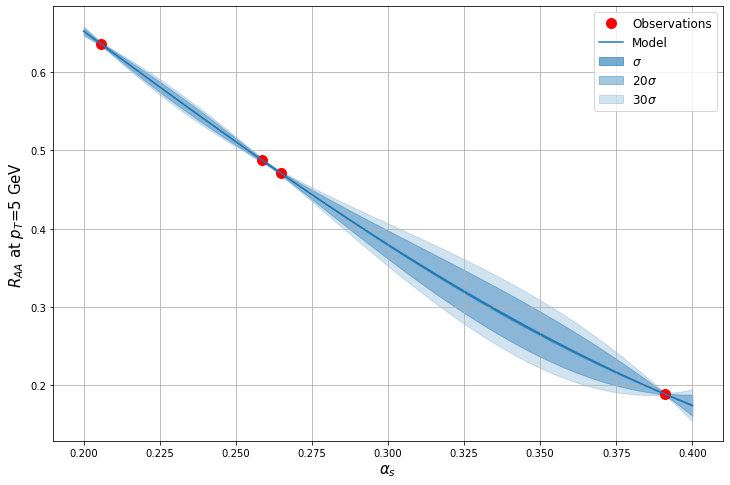

Optimization restart 1/1, f = -7.668312476194531
Working on 0/1 designs


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Shape of the result array is (1, 10)
Optimization restart 1/1, f = -13.290686071178275


<Figure size 432x288 with 0 Axes>

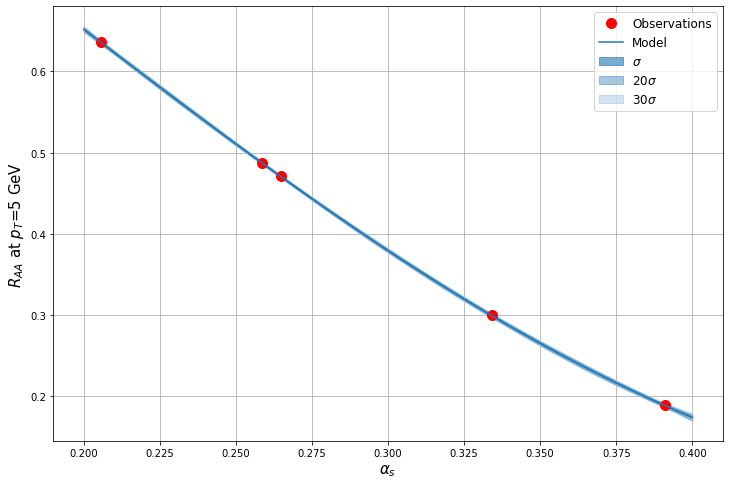

Optimization restart 1/1, f = -13.290686072658588
Working on 0/1 designs


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Shape of the result array is (1, 10)
Optimization restart 1/1, f = -21.234328175816024


<Figure size 432x288 with 0 Axes>

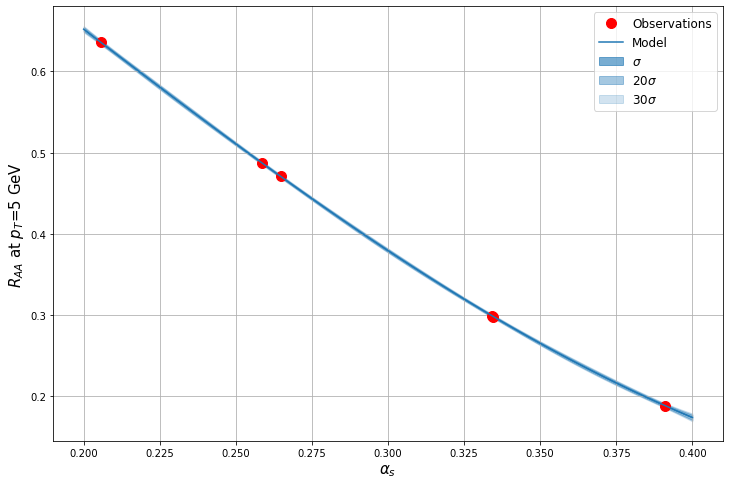

Optimization restart 1/1, f = -21.234328175816024
Working on 0/1 designs


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Shape of the result array is (1, 10)
Optimization restart 1/1, f = -28.13916820476738


<Figure size 432x288 with 0 Axes>

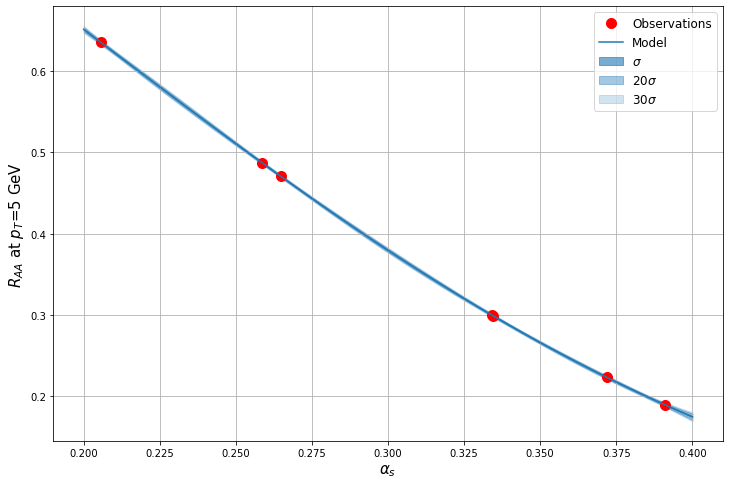

Optimization restart 1/1, f = -28.13916820476738
Working on 0/1 designs


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Shape of the result array is (1, 10)
Optimization restart 1/1, f = -35.85592165558255


<Figure size 432x288 with 0 Axes>

In [11]:
max_iterations = 6
x_plot = np.linspace(0.2, 0.4,100).reshape(-1,1)

for i in range(0,max_iterations):
    plt.figure(figsize=(12, 8))
    #fig,axs = plt.subplots(nrow=2, ncols=3)
    mu_plot, var_plot = model_emukit.predict(x_plot)
    mu_plot = mu_plot.reshape(-1,1)

    plt.plot(model_emukit.X, model_emukit.Y, "ro", markersize=10, label="Observations")
    plt.plot(x_plot, mu_plot, "C0", label="Model")
    plt.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - np.sqrt(var_plot)[:, 0], color="C0", alpha=0.6, label=r'$\sigma$')

    plt.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 20 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 20 * np.sqrt(var_plot)[:, 0], color="C0", alpha=0.4, label=r'$20\sigma$')

    plt.fill_between(x_plot[:, 0],
                 mu_plot[:, 0] + 30 * np.sqrt(var_plot)[:, 0],
                 mu_plot[:, 0] - 30 * np.sqrt(var_plot)[:, 0], color="C0", alpha=0.2, label=r'$30\sigma$')
    plt.legend(loc='upper right', prop={'size': LEGEND_SIZE})
    plt.xlabel(r"$\alpha_s$", fontsize=15)
    plt.ylabel(r"$R_{AA}$" + ' at '+r"$p_T$"+'=5 GeV', fontsize=15)
    plt.grid(True)
    plt.show()
    plt.savefig(f'figures/exp_design_ivr_{i}.png',dpi=100)
    ed=expdesign_loop.run_loop(f,1)